In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data 
df = pd.read_csv('heart_disease.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
# decide the x and y
x = df.drop('target', axis=1)
y = df['target']

In [5]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

In [6]:
# model training
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

In [7]:
# predict the values for x_test
y_prediction = model.predict(x_test)

### visualization without PCA

Text(0, 0.5, 'thalach')

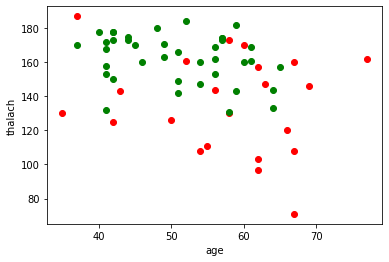

In [14]:
plt.scatter(x_test['age'][y_prediction == 0], x_test['thalach'][y_prediction == 0], color="red")
plt.scatter(x_test['age'][y_prediction == 1], x_test['thalach'][y_prediction == 1], color="green")
plt.xlabel('age')
plt.ylabel('thalach')

Text(0, 0.5, 'chol')

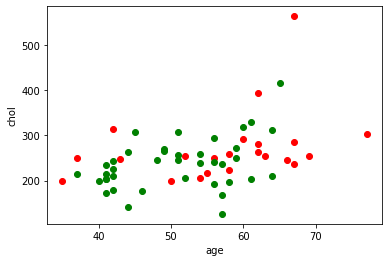

In [13]:
plt.scatter(x_test['age'][y_prediction == 0], x_test['chol'][y_prediction == 0], color="red")
plt.scatter(x_test['age'][y_prediction == 1], x_test['chol'][y_prediction == 1], color="green")
plt.xlabel('age')
plt.ylabel('chol')

### Visualization with PCA

In [26]:
from sklearn.decomposition import PCA

# create pca object 
pca = PCA(n_components=2)

# extract 2 features from 13 independent variables
# principal_components = pca.fit_transform(x_test, y_test)
principal_components = pca.fit_transform(x_test)
# print(principal_components[:, 0])

Text(0, 0.5, 'principal component 2')

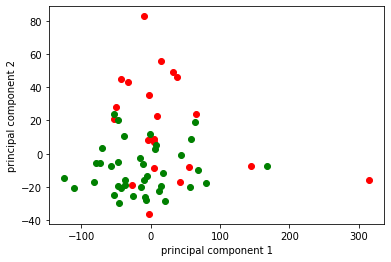

In [27]:
plt.scatter(principal_components[:, 0][y_prediction == 0], principal_components[:, 1][y_prediction == 0], color="red")
plt.scatter(principal_components[:, 0][y_prediction == 1], principal_components[:, 1][y_prediction == 1], color="green")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')